In [2]:
import os
from pathlib import Path

from qiboconnection.api import API

from qililab import build_platform
import numpy as np
import matplotlib.pyplot as plt

PATH = os.getcwd()  
os.environ["DATA"] = f"{PATH}/data"
os.environ["RUNCARDS"] = f"{PATH}/runcards"

[Qibo 0.1.7|INFO|2022-10-22 10:34:19]: Using numpy backend on /CPU:0
[Qibo 0.1.7|WARNING|2022-10-22 10:34:19]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.


In [3]:
"""Load the platform 'sauron' from the runcard."""
platform = build_platform(name="sauron_vna")

[qililab] [0.9.0|INFO|2022-10-22 10:34:21]: Building platform
INFO:qililab.config.config:Building platform


In [4]:
platform.connect()

[qililab] [0.9.0|INFO|2022-10-22 10:34:23]: Connecting to instrument keysight_e5080b_controller.
INFO:qililab.config.config:Connecting to instrument keysight_e5080b_controller.


In [5]:
e5080b = platform.instruments.elements[0]

In [6]:
type(e5080b)

qililab.instruments.keysight.e5080b_vna.E5080B

In [7]:
e5080b.read()

'+1\n'

In [8]:
e5080b.send_command(command="*CLS")

7

In [9]:
e5080b.send_command(command="*IDN?")
e5080b.read()

'Keysight Technologies,E5080B,MY59202481,A.15.10.06\n'

In [10]:
e5080b.number_points = 1000

In [11]:
e5080b.scattering_parameter = "S21"

In [12]:
e5080b.autoscale()

In [13]:
e5080b.output(arg='ON')

10

In [14]:
e5080b.frequency_span = 10e3
e5080b.frequency_center = 6e9
e5080b.scattering_parameter = "S21"
e5080b.power = 0
e5080b.if_bandwidth = 1000

In [25]:
e5080b.power = -60
e5080b.frequency_start = 1e9
e5080b.frequency_stop = 20e9
e5080b.if_bandwidth = 1000

In [26]:
e5080b.electrical_delay(time="100E-9")

In [34]:
def mag(real, imag):
    m = 20*np.log10(np.sqrt(real**2+imag**2))
    return (m)

def phase(real,imag):
    p = np.arctan(imag/real)
    return (p)

In [35]:
S21_complex = e5080b.get_data()
mag = mag(S21_complex.real, S21_complex.imag)
phase = phase(S21_complex.real, S21_complex.imag)
freq = np.linspace(e5080b.frequency_start,e5080b.frequency_stop,e5080b.number_points)*1e-9

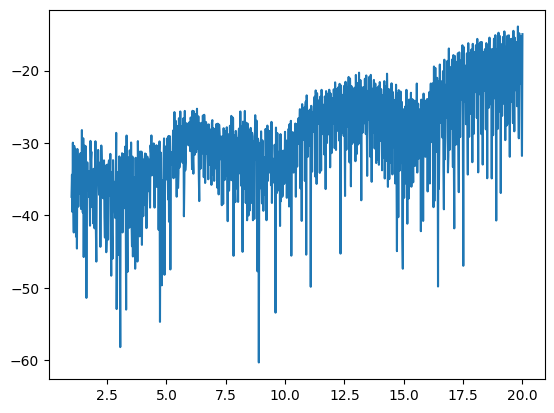

In [32]:
plt.plot(freq,mag)

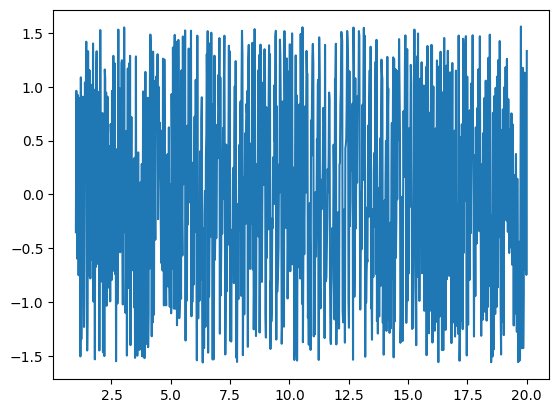

In [36]:
plt.plot(freq,phase)

In [31]:
platform.close()

[qililab] [0.9.0|INFO|2022-10-22 10:33:49]: Closing instrument keysight_e5080b_controller.
INFO:qililab.config.config:Closing instrument keysight_e5080b_controller.
